In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

0


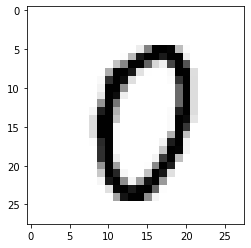

In [ ]:
image_index = 1000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train.shape


(10000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [ ]:

model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1391 - accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0689 - accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0487 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0357 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0282 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0176 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.0682 - accuracy: 0.9838
INFO:tensorflow:Assets written to: gdrive/MyDrive/assets


In [ ]:
model.save('/content/drive/MyDrive/MNIST digit recognition/model.h5') # 
print("Model Successfully Saved in drive")

Model Successfully Saved in drive


In [ ]:
import cv2

import numpy as np
from keras_preprocessing import image

In [ ]:
images = image.load_img("/content/drive/MyDrive/MNIST digit recognition/sample_image.png", target_size=(28, 28))
x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)



In [ ]:
ans=model.predict(x)
print(ans.argmax())

7


8


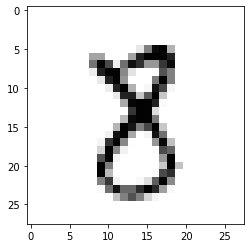

In [ ]:
image_index = 401
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())